In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
import librosa
from IPython.display import Audio


Get Data

In [66]:
features = pd.read_csv('../data/sampled_features.csv', index_col=[0], header=[0,1,2])
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
32081        -0.149236  0.348979 -0.256342  0.818010 -0.754737  0.595361   
138317       -0.024289 -0.320302 -0.571483  0.589557 -0.790646  0.336780   
125817        0.568068 -0.857945  0.861216 -1.016349 -0.560541 -0.892692   
117172       -0.492603 -0.944479 -0.732962 -0.879166 -0.951663 -0.611848   
131789        0.107442  1.453892  0.412687  0.914714 -0.158467  0.807896   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        05        06   
track_id                                            ...                       
32081      -0.575464  0.118675 -1.128392 -1.013314  ...  0.021267  0.018633   
138317      1.850241  1.266195  0.189149 -0.537890  ...  0.021862  0.020002   
125817     -1.317466  2.829233 -1.598327 -1.633583  ...  0.034048  0.047383   
117172     -0.969072 -0.495137 -0.722001  0.253871  ...  0.029845  0.023364   
131789      2.293441  6.171995  0.721523  0.457123  ...  0.020036  0.019293   

feature           zcr                                                    \
statistics   kurtosis       max      mean    median       min      skew   
number             01        01        01        01        01        01   
track_id                                                                  
32081       27.748169  0.374023  0.057702  0.051270  0.000000  4.503321   
138317       8.863070  0.256836  0.058061  0.054199  0.011719  1.982626   
125817      97.155006  0.397949  0.014030  0.007812  0.002441  8.558769   
117172       5.088123  0.191406  0.029363  0.020020  0.002441  1.997258   
131789      16.671103  0.528320  0.050367  0.035156  0.000000  3.597306   

feature                             genre  
statistics       std Unnamed: 519_level_1  
number            01 Unnamed: 519_level_2  
track_id                                   
32081       0.037173                 Rock  
138317      0.024780                 Rock  
125817      0.024152                 Rock  
117172      0.024906                 Rock  
131789      0.052730                 Rock  

[5 rows x 519 columns]

In [17]:
features

,zcr,cqt0,cqt1,cqt2,cqt3,cqt4,spec_cent,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,genre
track_id,,,,,,,,,,,,,
32081,0.057702,0.529531,0.499841,0.521039,0.533653,0.596229,1322.548340,-168.611328,150.510864,-42.042133,60.441593,-11.695156,Rock
138317,0.058061,0.538762,0.542281,0.551309,0.540180,0.600087,1220.237793,-110.392471,157.805649,-44.511337,37.518093,-10.147263,Rock
125817,0.014030,0.307532,0.288744,0.309664,0.317820,0.413866,412.163483,-369.393616,158.995499,57.744366,24.461973,20.091812,Rock
117172,0.029363,0.507552,0.452046,0.472171,0.507152,0.471840,693.699158,-410.308472,125.683067,17.940952,9.591949,15.241721,Rock
131789,0.050367,0.515940,0.684351,0.852430,0.607256,0.417200,1289.890503,-130.175446,147.221588,-11.299978,38.379189,-13.709072,Rock
125825,0.012672,0.380697,0.407970,0.390549,0.342497,0.299854,301.440399,-352.412476,182.711319,41.255470,31.472715,35.745155,Rock
62586,0.044417,0.453059,0.533861,0.610969,0.569625,0.611056,1251.518921,-97.536743,142.490234,-29.775126,56.459694,7.493850,Rock
133276,0.046413,0.498574,0.410018,0.374669,0.497583,0.692163,1071.556274,-149.428757,158.869446,-17.852592,41.778591,-13.286477,Rock
122400,0.057416,0.581058,0.547726,0.543105,0.601892,0.686360,1163.194702,-166.303757,172.946548,-41.460636,11.397969,0.068196,Rock


Dimesion Reduction and Scale

In [67]:
import umap.umap_ as umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [68]:
col_names = features.columns[:-1]
just_stats = features[col_names]

In [69]:
just_stats

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
32081        -0.149236  0.348979 -0.256342  0.818010 -0.754737  0.595361   
138317       -0.024289 -0.320302 -0.571483  0.589557 -0.790646  0.336780   
125817        0.568068 -0.857945  0.861216 -1.016349 -0.560541 -0.892692   
117172       -0.492603 -0.944479 -0.732962 -0.879166 -0.951663 -0.611848   
131789        0.107442  1.453892  0.412687  0.914714 -0.158467  0.807896   
...                ...       ...       ...       ...       ...       ...   
53724         0.200743 -0.116722 -0.105773  0.002670  0.250894  1.321337   
66187        -0.301123 -0.508357  0.303372 -0.363054 -0.925623 -0.046361   
88870        -0.573965 -0.121836 -0.869821  1.268065 -1.014873 -1.061127   
53726         0.915941  0.531422  0.899869  0.844285  1.425183  2.511899   
73585        -0.905365 -0.896539 -1.155511 -0.786283 -0.506451 -0.976326   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
32081      -0.575464  0.118675 -1.128392 -1.013314  ...  0.102446  0.021267   
138317      1.850241  1.266195  0.189149 -0.537890  ...  0.103358  0.021862   
125817     -1.317466  2.829233 -1.598327 -1.633583  ...  0.124349  0.034048   
117172     -0.969072 -0.495137 -0.722001  0.253871  ...  0.114534  0.029845   
131789      2.293441  6.171995  0.721523  0.457123  ...  0.074773  0.020036   
...              ...       ...       ...       ...  ...       ...       ...   
53724       0.319310  0.098864 -0.052628  0.049227  ...  0.080259  0.017170   
66187      -0.249424 -0.720625 -1.422861 -0.332494  ...  0.180406  0.021993   
88870      -0.740415 -0.229835  1.810650 -0.789070  ...  0.113271  0.019685   
53726       2.204504  0.838567  1.717911  2.062873  ...  0.072513  0.015393   
73585      -0.870058 -0.574491  0.301976 -0.815685  ...  0.145130  0.035529   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
32081       0.018633  27.748169  0.374023  0.057702  0.051270  0.000000   
138317      0.020002   8.863070  0.256836  0.058061  0.054199  0.011719   
125817      0.047383  97.155006  0.397949  0.014030  0.007812  0.002441   
117172      0.023364   5.088123  0.191406  0.029363  0.020020  0.002441   
131789      0.019293  16.671103  0.528320  0.050367  0.035156  0.000000   
...              ...        ...       ...       ...       ...       ...   
53724       0.019935   7.765057  0.330078  0.041031  0.033691  0.004395   
66187       0.034329  65.133141  0.662598  0.041213  0.027832  0.006836   
88870       0.021500  29.018076  0.385254  0.047524  0.042969  0.002441   
53726       0.016854   4.923244  0.456543  0.061101  0.051758  0.002930   
73585       0.025985  62.304047  0.575195  0.027274  0.019043  0.000000   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
32081       4.503321  0.037173  
138317      1.982626  0.024780  
125817      8.558769  0.024152  
117172      1.997258  0.024906  
131789      3.597306  0.052730  
...              ...       ...  
53724       2.329271  0.026736  
66187       7.304022  0.060082  
88870       3.566794  0.032763  
53726       1.843489  0.038461  
73585       7.760744  0.050857  

[1600 rows x 518 columns]

In [70]:
scaled_stats = scaler.fit_transform(just_stats)

In [71]:
scaled_stats

array([[-0.15557946,  0.2126169 , -0.05361851, ..., -0.68723245,
         0.29238681, -0.19359859],
       [-0.08665831, -0.16504054, -0.07775179, ...,  3.71178841,
        -0.57847793, -0.66105258],
       [ 0.24008764, -0.4684181 ,  0.03196314, ...,  0.22923023,
         1.69348731, -0.68472542],
       ...,
       [-0.38986153, -0.05305121, -0.10059825, ...,  0.22923023,
        -0.03116986, -0.35993573],
       [ 0.43197558,  0.31556447,  0.03492311, ...,  0.41252276,
        -0.62654769, -0.14500756],
       [-0.572663  , -0.49019547, -0.12247617, ..., -0.68723245,
         1.41778084,  0.32254964]])

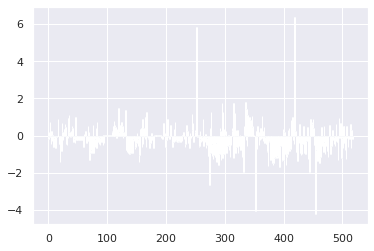

In [72]:
plt.bar(x=range(len(scaled_stats[0])), height=scaled_stats[0])
plt.show()

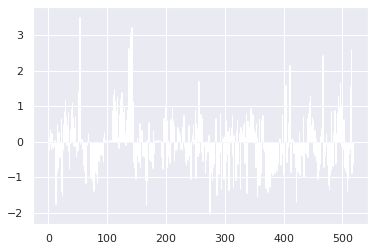

In [74]:
plt.bar(x=range(len(scaled_stats[11])), height=scaled_stats[11], x)
plt.show()

In [75]:
scaled_stats = pd.DataFrame(scaled_stats, columns = col_names, index = features.index)

In [76]:
scaled_stats['genre'] = features['genre']

In [77]:
scaled_stats

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
32081        -0.155579  0.212617 -0.053619  0.730843 -0.465035  0.248619   
138317       -0.086658 -0.165041 -0.077752  0.541329 -0.484727  0.108244   
125817        0.240088 -0.468418  0.031963 -0.790858 -0.358541 -0.559195   
117172       -0.344982 -0.517247 -0.090118 -0.677057 -0.573026 -0.406734   
131789       -0.013995  0.836090 -0.002385  0.811065 -0.138050  0.363997   
...                ...       ...       ...       ...       ...       ...   
53724         0.037470 -0.050166 -0.042088  0.054474  0.086437  0.642727   
66187        -0.239361 -0.271155 -0.010756 -0.248914 -0.558746 -0.099750   
88870        -0.389862 -0.053051 -0.100598  1.104188 -0.607689 -0.650633   
53726         0.431976  0.315564  0.034923  0.752639  0.730398  1.289043   
73585        -0.572663 -0.490195 -0.122476 -0.600005 -0.328879 -0.604597   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        05        06   
track_id                                            ...                       
32081      -0.287660  0.054479 -0.621998 -0.593653  ... -0.134148 -0.622359   
138317      0.962706  0.797923  0.108548 -0.336751  ... -0.037435 -0.398571   
125817     -0.670136  1.810570 -0.882566 -0.928824  ...  1.944747  4.076812   
117172     -0.490551 -0.343193 -0.396664  0.091089  ...  1.261110  0.150905   
131789      1.191160  3.976248  0.403737  0.200918  ... -0.334473 -0.514492   
...              ...       ...       ...       ...  ...       ...       ...   
53724       0.173565  0.041644 -0.025512 -0.019494  ... -0.800608 -0.409614   
66187      -0.119598 -0.489280 -0.785274 -0.225762  ... -0.016056  1.943156   
88870      -0.372686 -0.171311  1.007632 -0.472479  ... -0.391567 -0.153834   
53726       1.145316  0.520876  0.956211  1.068608  ... -1.089595 -0.913097   
73585      -0.439513 -0.394603  0.171107 -0.486861  ...  2.185600  0.579370   

feature          zcr                                                    \
statistics  kurtosis       max      mean    median       min      skew   
number            01        01        01        01        01        01   
track_id                                                                 
32081      -0.070107 -0.191930  0.370252  0.609848 -0.687232  0.292387   
138317     -0.341889 -0.817922  0.384422  0.741734  3.711788 -0.578478   
125817      0.928750 -0.064123 -1.353323 -1.346458  0.229230  1.693487   
117172     -0.396215 -1.167434 -0.748183 -0.796934  0.229230 -0.573423   
131789     -0.229521  0.632293  0.080772 -0.115524 -0.687232 -0.020628   
...              ...       ...       ...       ...       ...       ...   
53724      -0.357691 -0.426677 -0.287675 -0.181467  0.962400 -0.458717   
66187       0.467913  1.349575 -0.280492 -0.445238  1.878863  1.259990   
88870      -0.051831 -0.131939 -0.031417  0.236172  0.229230 -0.031170   
53726      -0.398588  0.248873  0.504408  0.631829  0.412523 -0.626548   
73585       0.427198  0.882689 -0.830635 -0.840896 -0.687232  1.417781   

feature              genre  
statistics       std        
number            01        
track_id                    
32081      -0.193599  Rock  
138317     -0.661053  Rock  
125817     -0.684725  Rock  
117172     -0.656291  Rock  
131789      0.393174  Rock  
...              ...   ...  
53724      -0.587261  Folk  
66187       0.670504  Folk  
88870      -0.359936  Folk  
53726      -0.145008  Folk  
73585       0.322550  Folk  

[1600 rows x 519 columns]

In [78]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_stats.drop(['genre'], axis=1))
embedding.shape

(1600, 2)

In [79]:
scaled_stats['umap1'] = embedding[:,0]
scaled_stats['umap2'] = embedding[:,1]

In [80]:
scaled_stats.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
32081        -0.155579  0.212617 -0.053619  0.730843 -0.465035  0.248619   
138317       -0.086658 -0.165041 -0.077752  0.541329 -0.484727  0.108244   
125817        0.240088 -0.468418  0.031963 -0.790858 -0.358541 -0.559195   
117172       -0.344982 -0.517247 -0.090118 -0.677057 -0.573026 -0.406734   
131789       -0.013995  0.836090 -0.002385  0.811065 -0.138050  0.363997   

feature                                             ...       zcr            \
statistics                                          ...  kurtosis       max   
number            07        08        09        10  ...        01        01   
track_id                                            ...                       
32081      -0.287660  0.054479 -0.621998 -0.593653  ... -0.070107 -0.191930   
138317      0.962706  0.797923  0.108548 -0.336751  ... -0.341889 -0.817922   
125817     -0.670136  1.810570 -0.882566 -0.928824  ...  0.928750 -0.064123   
117172     -0.490551 -0.343193 -0.396664  0.091089  ... -0.396215 -1.167434   
131789      1.191160  3.976248  0.403737  0.200918  ... -0.229521  0.632293   

feature                                                      genre     umap1  \
statistics      mean    median       min      skew       std                   
number            01        01        01        01        01                   
track_id                                                                       
32081       0.370252  0.609848 -0.687232  0.292387 -0.193599  Rock  6.431010   
138317      0.384422  0.741734  3.711788 -0.578478 -0.661053  Rock  6.063938   
125817     -1.353323 -1.346458  0.229230  1.693487 -0.684725  Rock  7.624497   
117172     -0.748183 -0.796934  0.229230 -0.573423 -0.656291  Rock  7.326121   
131789      0.080772 -0.115524 -0.687232 -0.020628  0.393174  Rock  8.480433   

feature         umap2  
statistics             
number                 
track_id               
32081        7.514296  
138317       7.355352  
125817      10.844329  
117172      11.455846  
131789       8.848786  

[5 rows x 521 columns]

Cluster Using DBSCAN

In [81]:
from sklearn.cluster import DBSCAN
train = scaled_stats[['umap1', 'umap2']]
train.head()

feature,umap1,umap2
statistics,,
number,,
track_id,,
32081,6.431010,7.514296
138317,6.063938,7.355352
125817,7.624497,10.844329
117172,7.326121,11.455846
131789,8.480433,8.848786


In [82]:
# Finding the optimal EPS value for DBSCAN

from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(train)
distances, indices = nbrs.kneighbors(train)
distances

array([[0.        , 0.11773915],
       [0.        , 0.0865968 ],
       [0.        , 0.06428441],
       ...,
       [0.        , 0.04100866],
       [0.        , 0.01650396],
       [0.        , 0.08747983]])

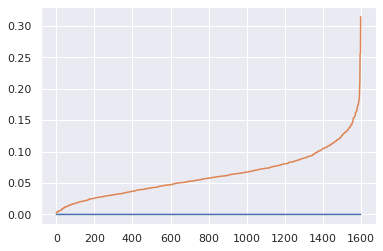

In [83]:
#optimal eps value found at the curvature

distances = np.sort(distances, axis = 0)
plt.plot(distances)

#eps value will be .18

In [94]:
dbscan = DBSCAN(eps=.17).fit(train)

In [95]:
set(dbscan.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25}

In [96]:
scaled_stats['cluster'] = dbscan.labels_

In [97]:
scaled_stats

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
32081        -0.155579  0.212617 -0.053619  0.730843 -0.465035  0.248619   
138317       -0.086658 -0.165041 -0.077752  0.541329 -0.484727  0.108244   
125817        0.240088 -0.468418  0.031963 -0.790858 -0.358541 -0.559195   
117172       -0.344982 -0.517247 -0.090118 -0.677057 -0.573026 -0.406734   
131789       -0.013995  0.836090 -0.002385  0.811065 -0.138050  0.363997   
...                ...       ...       ...       ...       ...       ...   
53724         0.037470 -0.050166 -0.042088  0.054474  0.086437  0.642727   
66187        -0.239361 -0.271155 -0.010756 -0.248914 -0.558746 -0.099750   
88870        -0.389862 -0.053051 -0.100598  1.104188 -0.607689 -0.650633   
53726         0.431976  0.315564  0.034923  0.752639  0.730398  1.289043   
73585        -0.572663 -0.490195 -0.122476 -0.600005 -0.328879 -0.604597   

feature                                             ...       zcr            \
statistics                                          ...       max      mean   
number            07        08        09        10  ...        01        01   
track_id                                            ...                       
32081      -0.287660  0.054479 -0.621998 -0.593653  ... -0.191930  0.370252   
138317      0.962706  0.797923  0.108548 -0.336751  ... -0.817922  0.384422   
125817     -0.670136  1.810570 -0.882566 -0.928824  ... -0.064123 -1.353323   
117172     -0.490551 -0.343193 -0.396664  0.091089  ... -1.167434 -0.748183   
131789      1.191160  3.976248  0.403737  0.200918  ...  0.632293  0.080772   
...              ...       ...       ...       ...  ...       ...       ...   
53724       0.173565  0.041644 -0.025512 -0.019494  ... -0.426677 -0.287675   
66187      -0.119598 -0.489280 -0.785274 -0.225762  ...  1.349575 -0.280492   
88870      -0.372686 -0.171311  1.007632 -0.472479  ... -0.131939 -0.031417   
53726       1.145316  0.520876  0.956211  1.068608  ...  0.248873  0.504408   
73585      -0.439513 -0.394603  0.171107 -0.486861  ...  0.882689 -0.830635   

feature                                            genre     umap1      umap2  \
statistics    median       min      skew       std                              
number            01        01        01        01                              
track_id                                                                        
32081       0.609848 -0.687232  0.292387 -0.193599  Rock  6.431010   7.514296   
138317      0.741734  3.711788 -0.578478 -0.661053  Rock  6.063938   7.355352   
125817     -1.346458  0.229230  1.693487 -0.684725  Rock  7.624497  10.844329   
117172     -0.796934  0.229230 -0.573423 -0.656291  Rock  7.326121  11.455846   
131789     -0.115524 -0.687232 -0.020628  0.393174  Rock  8.480433   8.848786   
...              ...       ...       ...       ...   ...       ...        ...   
53724      -0.181467  0.962400 -0.458717 -0.587261  Folk  6.381020   8.402367   
66187      -0.445238  1.878863  1.259990  0.670504  Folk  5.592688  10.589107   
88870       0.236172  0.229230 -0.031170 -0.359936  Folk  7.349751   8.106100   
53726       0.631829  0.412523 -0.626548 -0.145008  Folk  6.597605   8.216620   
73585      -0.840896 -0.687232  1.417781  0.322550  Folk  6.040743  11.261621   

feature    cluster  
statistics          
number              
track_id            
32081            0  
138317           0  
125817          11  
117172           1  
131789           0  
...            ...  
53724           12  
66187            5  
88870            0  
53726            0  
73585            5  

[1600 rows x 522 columns]

In [98]:
groups = scaled_stats.groupby('cluster')
for name, group in groups:
    print("cluster num {}: {} items".format(name, len(group)))

cluster num -1: 110 items
cluster num 0: 814 items
cluster num 1: 52 items
cluster num 2: 27 items
cluster num 3: 13 items
cluster num 4: 10 items
cluster num 5: 299 items
cluster num 6: 39 items
cluster num 7: 36 items
cluster num 8: 6 items
cluster num 9: 72 items
cluster num 10: 5 items
cluster num 11: 14 items
cluster num 12: 7 items
cluster num 13: 10 items
cluster num 14: 18 items
cluster num 15: 5 items
cluster num 16: 9 items
cluster num 17: 4 items
cluster num 18: 9 items
cluster num 19: 5 items
cluster num 20: 8 items
cluster num 21: 6 items
cluster num 22: 8 items
cluster num 23: 5 items
cluster num 24: 5 items
cluster num 25: 4 items


Cluster Results

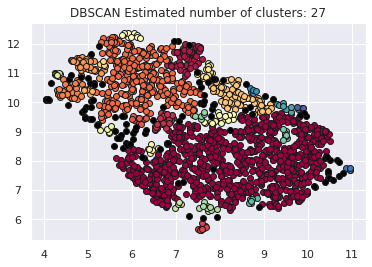

In [99]:
labels = dbscan.labels_

core_samples_mask = np.zeros_like(labels, dtype=bool)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = train[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = train[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Estimated number of clusters: %d' % len(unique_labels))
plt.show()

In [100]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(scaled_stats['genre'], dbscan.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(scaled_stats['genre'], dbscan.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(scaled_stats['genre'], dbscan.labels_))

Homogeneity: 0.206
Completeness: 0.156
V-measure: 0.177


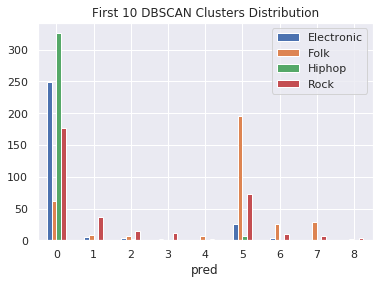

In [108]:
results = pd.DataFrame()
results['genre'] = scaled_stats['genre']
results = pd.get_dummies(results['genre'])
results['pred'] = dbscan.labels_
results = results.groupby(['pred']).sum()
results.iloc[1:10].plot.bar(rot=0, title="First 10 DBSCAN Clusters Distribution")